# Let's create the model we'll be using for object detection in luggage X-ray images.
This was made using Google Colab, since it provides a virtual GPU to use for training.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# tells you if you're running code on the GPU.
# must print "True"
import torch
print(torch.cuda.is_available())

True


In [4]:
# install detecto.
# this library uses Faster R-CNN architecture.
!pip install detecto

In [5]:
# import all neccessary libraries.
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# makes some edits to the images that will be used to train.
custom_transforms = transforms.Compose([
transforms.ToPILImage(),
transforms.Resize(900),
transforms.RandomHorizontalFlip(0.5),
transforms.ColorJitter(saturation=0.2),
transforms.ToTensor(),
utils.normalize_transform(),
])

In [7]:
# set the path for the training and testing datasets.
Train_dataset=core.Dataset('/content/drive/MyDrive/500_pistol_imgs/train',transform=custom_transforms)
Test_dataset = core.Dataset('/content/drive/MyDrive/500_pistol_imgs/test')

In [8]:
# train the model.
loader=core.DataLoader(Train_dataset, batch_size=2, shuffle=True)
model = core.Model(['pistol'])
losses = model.fit(loader, Test_dataset, epochs=10, lr_step_size=5, learning_rate=0.01, verbose=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 0/200 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.24it/s]


Loss: 0.2506277158111334
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


Loss: 0.25813994005322455
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


Loss: 0.18345719076693057
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


Loss: 0.19097434028983115
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


Loss: 0.19111177183687686
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


Loss: 0.1708741944655776
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


Loss: 0.1763168567046523
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:47<00:00,  1.14s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.30it/s]


Loss: 0.17472068037837743
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:46<00:00,  1.13s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.33it/s]


Loss: 0.17593296308070422
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 200/200 [03:46<00:00,  1.13s/it]


Begin iterating over validation dataset


100%|██████████| 100/100 [00:30<00:00,  3.32it/s]

Loss: 0.1760353596135974


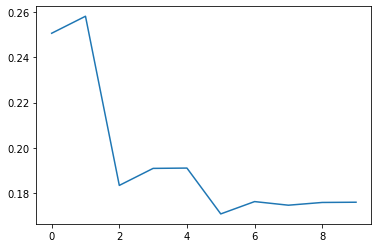

In [9]:
# show the graph for the loss. our goal is for it to stedily decrease as the training progresses.
plt.plot(losses)
plt.show()

In [10]:
# if the loss graph looks good, save the model
model.save('/content/drive/MyDrive/500_pistol_imgs/new_model_weights.pth')

# Take the model_weights.pth file, and use it in the image enhancement program.
